<a href="https://colab.research.google.com/github/Lekkice/ADA-Informes/blob/main/Informe3_maxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de sub-arreglo máximo
Entrada: Arreglo con n números.

Salida: Sub-arreglo contiguo con la suma máxima.

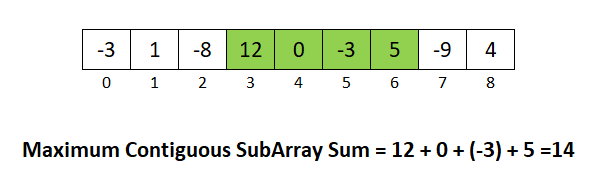

El problema del subarreglo máximo es un problema de optimización utilizado para encontrar un conjunto máximo de elementos contiguos en un grupo de datos. Algunas de sus aplicaciones son que puede utilizar para encontrar el área con mayor brillo en una imagen, y para determinar en qué periodo una compañia tuvo mayores ganancias.

# 2. MaxSubArray
# 2.1 Descripción del algoritmo
Este algoritmo recibe un arreglo de largo n como entrada. Luego, utilizando recursión, divide el arreglo en 3 subarreglos que se comparan al final. Uno con los elementos a la izquierda del arreglo, otro con los de la derecha y el que queda incluye los elementos que están en la mitad del arreglo.

Función recursiva:
1. Divide arreglo en 2.
2. Encuentra el subarreglo máximo en la parte de la izquierda, derecha y luego uno que pase por la mitad del arreglo.
3. Compara los 3 subarreglos máximos y retorna el mayor.

# 2.2 Código


In [27]:
import operator

def encontrarMax(izquierda, medio, derecha, a, verbose): # [0] = suma, [1] = indice inicio, [2] = indice final
    lista = [izquierda, medio, derecha]
    resultado = max(lista, key=operator.itemgetter(0)) # compara las 3 tuplas usando sus sumas y luego retorna la que tiene mayor valor
    if verbose:
        print("subarreglos:", a[izquierda[1]:izquierda[2]+1], a[medio[1]:medio[2]+1])
        print(f"subarreglo máximo: {a[resultado[1]:resultado[2]+1]} con una suma de {resultado[0]}")
        print()
    return  resultado

def maxSubArray(a, ini, fin, verbose = False):
    if verbose:
        print(f"calculando subarreglo máximo de {a[ini:fin+1]}")
    if ini == 0 or ini == fin: return a[ini], ini, ini # si hay un solo elemento, se retorna
    mitad = (ini + fin) // 2

    ### encuentra el subarreglo que contiene el punto de división
    maximoL = -100000
    indiceMaxL = mitad
    suma = 0
    for i in range(mitad, ini-1, -1): # recorre el arreglo desde la mitad hasta el inicio
        suma += a[i]
        if suma > maximoL: # si la suma desde el comienzo hasta i es mayor al máximo guardado
            maximoL = suma # el máximo se actualiza
            indiceMaxL = i
    
    maximoR = -100000
    indiceMaxR = mitad
    suma = 0
    for i in range(mitad, fin+1):
        suma += a[i]
        if suma > maximoR:
            maximoR = suma
            indiceMaxR = i

    sumaMedio = maximoL + maximoR - a[mitad] # el elemento en la mitad del arreglo se suma 2 veces
    ###
    return encontrarMax(maxSubArray(a, ini, mitad, verbose), (sumaMedio, indiceMaxL, indiceMaxR), maxSubArray(a, mitad + 1, fin, verbose), a, verbose)

# 2.3 Ejemplo
Consideremos el arreglo [-3, 5, -7, 10] como ejemplo.

La función se llama recursivamente hasta que queden 2 subarreglos con 1 elemento. Luego, se juntan y el algoritmo calcula el subarreglo máximo de [-3, 5].

Se compara el subarreglo máximo de la mitad de la izquierda [-3], el subarreglo máximo que pasa por las 2 mitades [-3, 5] y el subarreglo de la derecha [5]. Luego, retorna el subarreglo máximo [5].

Se realiza el mismo procedimiento con la mitad derecha del arreglo de entrada [-7, 10], y se obtiene [10].

Con [5] en la izquierda del arreglo, [5, -7, 10] en el medio y [10] en la derecha, se comparan los 3 subarreglos máximos y se retorna [10].

# 2.4 Ejecución paso a paso

In [21]:
lista = [-3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
resultado = maxSubArray(lista, 0, len(lista)-1, True)
print(lista[resultado[1]:resultado[2]+1])

calculando subarreglo máximo de [-3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
calculando subarreglo máximo de [-3, -16, -23, 18, 20, -7]
calculando subarreglo máximo de [-3, -16, -23]
calculando subarreglo máximo de [-3, -16]
calculando subarreglo máximo de [-3]
calculando subarreglo máximo de [-16]
subarreglos: [-3] [-3]
subarreglo máximo: [-3] con una suma de -3

calculando subarreglo máximo de [-23]
subarreglos: [-3] [-16]
subarreglo máximo: [-3] con una suma de -3

calculando subarreglo máximo de [18, 20, -7]
calculando subarreglo máximo de [18, 20]
calculando subarreglo máximo de [18]
calculando subarreglo máximo de [20]
subarreglos: [18] [18, 20]
subarreglo máximo: [18, 20] con una suma de 38

calculando subarreglo máximo de [-7]
subarreglos: [18, 20] [18, 20]
subarreglo máximo: [18, 20] con una suma de 38

subarreglos: [-3] [-23, 18, 20]
subarreglo máximo: [18, 20] con una suma de 38

calculando subarreglo máximo de [12, -5, -22, 15, -4, 7]
calculando subarreglo máximo de [

#3. Tiempo de Ejecucción

El problema del subarreglo máximo puede ser implementado de distintas maneras, cada manera con un tiempo de ejecución distinto a los anteriores pero ninguno de estos depende del como esten los datos, quiero decir que no existe diferencia alguna entre un supuesto $mejor$ o $peor$ caso, ambos presentan el mismo tiempo de ejecucción. Esto es debido a que no existen situaciones en ambos casos que produzcan que ocurran más iteraciones o menos. 
La forma en que fue implementado este algoritmo antes es llamada "divide y vencerás", esto significa que el arreglo se va a dividir recursivamente a la mitad y cuando no pueda seguír dividiendose se van a comenzar a sumar sus valores para buscar la suma mayor a medida que se van volviendo a unir los subarreglos.
Por la forma en que esto se realiza, dividir constantemente para luego recorrer todos estos datos de forma lineal, tenemos que esta forma de implementación tiene la forma de $T(n) = 2T(n/2) + O(n)$ que es equivalente a $O(nlogn)$.

# 4.1 Correctitud de MaxSubArrayMid
## Teorema

La función MaxSubArrayMid retorna el subarreglo máximo que pasa por el medio del arreglo de entrada.

## Prueba del teorema

En cada iteración, se realiza un paso en el recorrido del arreglo desde el medio hacia una posición más cercana al inicio o el final, según la mitad. Asumiendo que *m* es el medio del arreglo y *s* el valor máximo, probaremos la siguiente propiedad invariante:
> Al final de cada iteración, *s* es la suma máxima hasta ese punto.

## Inicialización
Al final de la primera iteración (*i = 0*), el elemento en la posición *m - 0* es la suma máxima, y como el subarreglo debe tener al menos un elemento, se cumple la propiedad.

## Mantención
Aplicando inducción, se puede asumir que al comienzo de cada iteración, *s* es la suma máxima hasta la posición anterior a *i*. Para mantener la propiedad, los elementos entre *m* y *m ± i* se suman y luego se comparan el valor de *s*. Si el valor de la nueva suma es mayor a *s*, su valor se actualiza y se seguirá cumpliendo la propiedad invariante.

## Correctitud
La propiedad invariante es verdadera al inicio del bucle y se mantiene en cada iteración. Por lo tanto, se puede decir que al finalizar el algoritmo, el resultado será un subarreglo con la suma máxima desde la posición *m* hasta *m ± n/2*.

# 4.2 Correctitud de MaxSubArray
## Teorema
El algoritmo *maxSubArray* recibe un arreglo de n elementos y retorna el subarreglo que contiene el valor máximo al sumar todos sus elementos contiguos.

## Prueba del teorema
**Caso base:** Cuando sólo hay un elemento en el arreglo, el elemento máximo es el único que contiene. Por lo tanto, retorna este elemento.

**Caso general (n>1):** Se asume que *maxSubArray* es correcto si el tamaño del arreglo es m < n.

El algoritmo divide el arreglo en 2 mitades de largo n/2 si n > 1, y luego las procesa utilizando el mismo algoritmo. Como el tamaño de los algoritmos es menor a la del arreglo original, se cumple que m < n.

#5. Experimentos

##5.1. Comparacion del algoritmo

En este experimento vamos a comparar el algorimo creado en este informe con el algoritmo kadane, este algoritmo lleva a cabo la misma tarea que el algoritmo max sub-array, pero a diferencia de este kadane no es recursivo.

In [10]:
# Código de kadane
 
import random
from sys import maxsize
  
def kadane(a,size):
  
    max_so_far = -maxsize - 1
    max_ending_here = 0
    start = 0
    end = 0
    s = 0
  
    for i in range(0,size):
  
        max_ending_here += a[i]
  
        if max_so_far < max_ending_here:
            max_so_far = max_ending_here
            start = s
            end = i
  
        if max_ending_here < 0:
            max_ending_here = 0
            s = i+1
        
        return max_so_far

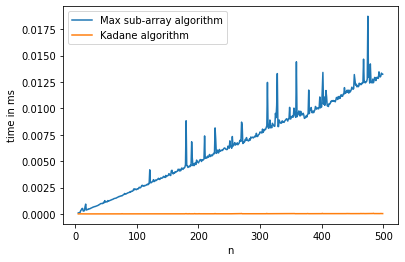

In [12]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, 0, {len(a)-1}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Max sub-array algorithm", "Kadane algorithm"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis

Como se aprecia, el algoritmo kadane es más efectivo que el metodo recursivo, y si se intenta decir cual es la complejidad de este algoritmo, entonces es probable que este sea $O(n)$, mientras que el metodo recusivo posiblemente sea $O(n log(n))$.

##5.2. Correctitud de los valores entregados por el algoritmo

En el siguiente experimento comprobaremos lo correcto que son los valores que entrega el algoritmo subArregloMaximo en comparación al algoritmo kadane.

El motivo que se utilizó al algoritmo kadane como base para hacer la comparación de correctitud del algoritmo subArregloMaximo, es por ser un método ya comprobado de ser funcional y por su eficacia a la hora de resolver el problema.

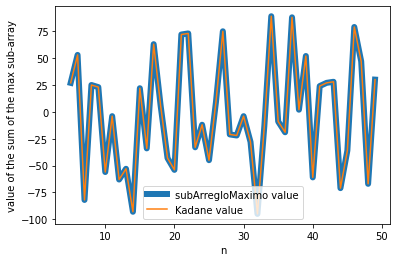

In [46]:
import matplotlib.pyplot as plt
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,50):

  a = random.sample(range(-100, 100), n)
  
  sum1 = maxSubArray(a, 0, len(lista)-1)[0]

  x.append(n)
  y.append(sum1)

  sum2 = kadane(a,len(a))

  x1.append(n)
  y1.append(sum2)


plt.plot(x,y, linewidth = 6)
plt.plot(x1,y1)
plt.legend(["subArregloMaximo value", "Kadane value"])

plt.xlabel('n')
plt.ylabel('value of the sum of the max sub-array')

plt.show()

### Análisis
Los dos algoritmos retornan los mismos valores para el mismo arreglo, por lo tanto, lo más probable es que ambos sean correctos.